# Import a .csv (or other source data) into Pandas DataFrame to Explore

In [70]:
import pandas as pd
from function_library.py_data_engineering.utils import categorize_dataframe_columns
from function_library.py_data_visualizations.basic_data_descriptions import basic_dataframe_description
from function_library.py_data_visualizations.basic_plots import plot_histogram, plot_bar_plot_with_optional_breakdown

In [71]:
df = pd.read_csv("case_study_july_dataset.csv")

In [72]:
df.columns.to_list()

['contest_id',
 'picks',
 'insured',
 'amount',
 'contest_result',
 'contest_payout',
 'contest_created',
 'contest multiplier',
 'user_id',
 'pick_id',
 'pick_nr',
 'sport_name',
 'league_name',
 'player_team_name',
 'player_name',
 'stat',
 'pick_value',
 'match_period_long',
 'pick',
 'pick_outcome',
 'pick_result',
 'pick_multiplier',
 'match_date',
 'home_team_name',
 'score_home',
 'score_away',
 'away_team_name']

In [73]:
basic_dataframe_description(df, transpose_description=True)


df Overview:
 Shape: (589843, 27)
 Columns: 27
 Memory: 626.15 MB
 Missing values: 6824 total
 Columns with missing values: 2
 Columns with missing values: ['score_home', 'score_away']
  Missing values per column:
    score_home: 3406
    score_away: 3418
 Data types: {dtype('O'): 16, dtype('float64'): 8, dtype('int64'): 2, dtype('bool'): 1}


,count,mean,std,min,25%,50%,75%,max
picks,589843.0,4.313363,2.323583,2.00,2.00,4.00,6.0,9.00
amount,589843.0,13.611373,23.147611,1.00,5.00,9.00,15.0,750.00
contest_payout,589843.0,10.027185,51.750497,0.00,0.00,0.00,0.0,1499.74
contest multiplier,589843.0,16.203390,23.609741,0.01,3.10,5.62,17.1,110.00
pick_nr,589843.0,2.656682,1.807422,1.00,1.00,2.00,3.0,9.00
pick_value,589843.0,11.228803,26.817808,0.50,1.50,4.50,15.5,960.32
pick_outcome,589843.0,11.024871,25.569450,0.00,1.00,5.00,15.0,947.43
pick_multiplier,589843.0,1.960828,1.951127,1.03,1.49,1.77,1.8,325.99
score_home,586437.0,24.135853,36.861227,-9.00,2.00,5.00,21.0,947.00
score_away,586425.0,23.367824,34.531147,0.00,2.00,5.00,16.0,119.00


In [74]:
df_col_dict = categorize_dataframe_columns(df)
for column in df_col_dict['float']:
    print(column)

amount
contest_payout
contest multiplier
pick_value
pick_outcome
pick_multiplier
score_home
score_away


In [75]:
df['pick_result'].unique()

array(['lost', 'won', 'cancelled'], dtype=object)

In [76]:
df['pick_result_win'] = df['pick_result'] == 'won'

In [77]:
df['pick_result_win']

0         False
1         False
2         False
3         False
4         False
          ...  
589838    False
589839    False
589840    False
589841     True
589842    False
Name: pick_result_win, Length: 589843, dtype: bool

In [78]:
df['sport_name'].unique()

array(['eSports', 'Soccer', 'Baseball', 'Basketball', 'Golf', 'Football',
       'MMA', 'Olympics'], dtype=object)

In [79]:
df_pick_by_sport = df.groupby(['sport_name', 'league_name']).agg({
    'amount': 'sum',
    'contest_payout': 'sum',
    'pick_result_win': 'mean'
}).sort_values(by=['sport_name','pick_result_win'], ascending=[True, True])
df_pick_by_sport

amount  contest_payout  \
sport_name league_name                                                      
Baseball   HR Derby                               47421.0        24629.19   
           Major League Baseball                4896930.0      3614975.71   
Basketball BIG3                                    9032.0         7083.00   
           NBA Summer League                     313523.0       235794.41   
           Olympic Basketball                    122310.0        66142.29   
           Women's NBA                          1376087.0      1016962.42   
Football   National Football League               12808.0         7855.60   
           Canadian Football League               86007.0       100703.86   
Golf       European Golf Tour                      3104.0         1852.04   
           PGA Tour                              117231.0        76715.05   
           LIV Golf Tour                            558.0          447.55   
           Ladies PGA Tour                          816.0           54.10   
MMA        Ultimate Fighting Championship         54402.0        38421.40   
           Boxing                                  1008.0         1398.73   
Olympics   Gymnastics                              1616.0         1698.47   
           Swimming                               31917.0        23995.90   
Soccer     CONMEBOL Copa América                  73201.0        20820.75   
           Liga MX                                25144.0        22777.83   
           Major League Soccer                    39647.0        26634.09   
           Olympic Soccer                          8809.0         8774.50   
           UEFA European Football Championship   122292.0        83972.02   
eSports    CSGO                                  322556.0       232847.14   
           Valorant                               87657.0        61631.15   
           League of Legends                     264102.0       228247.91   
           Dota2                                  10395.0        10029.83   

                                                pick_result_win  
sport_name league_name                                           
Baseball   HR Derby                                    0.456050  
           Major League Baseball                       0.535053  
Basketball BIG3                                        0.367451  
           NBA Summer League                           0.400066  
           Olympic Basketball                          0.487670  
           Women's NBA                                 0.554430  
Football   National Football League                    0.418605  
           Canadian Football League                    0.514887  
Golf       European Golf Tour                          0.467532  
           PGA Tour                                    0.469919  
           LIV Golf Tour                               0.541667  
           Ladies PGA Tour                             0.625000  
MMA        Ultimate Fighting Championship              0.451916  
           Boxing                                      0.755319  
Olympics   Gymnastics                                  0.511811  
           Swimming                                    0.551092  
Soccer     CONMEBOL Copa América                       0.349284  
           Liga MX                                     0.372281  
           Major League Soccer                         0.421384  
           Olympic Soccer                              0.431784  
           UEFA European Football Championship         0.532556  
eSports    CSGO                                        0.490928  
           Valorant                                    0.505819  
           League of Legends                           0.507278  
           Dota2                                       0.581197

In [80]:
df_sums = df.groupby(['sport_name']).agg({
    'amount': 'sum',
    'contest_payout': 'sum',
    'pick_outcome': 'mean'
}).sort_values(by='contest_payout', ascending=False)
df_sums

,amount,contest_payout,pick_outcome
sport_name,,,
Baseball,4944351.0,3639604.90,4.759717
Basketball,1820952.0,1325982.12,14.699060
eSports,684710.0,532756.03,21.193590
Soccer,269093.0,162979.19,1.993528
Football,98815.0,108559.46,125.069688
Golf,121709.0,79068.74,53.263396
MMA,55410.0,39820.13,30.224523
Olympics,33533.0,25694.37,188.664767


In [81]:
df_unique_contest = df.drop_duplicates(subset=['contest_id'])

In [82]:
df_unique_contest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177911 entries, 0 to 589839
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   contest_id          177911 non-null  object 
 1   picks               177911 non-null  int64  
 2   insured             177911 non-null  bool   
 3   amount              177911 non-null  float64
 4   contest_result      177911 non-null  object 
 5   contest_payout      177911 non-null  float64
 6   contest_created     177911 non-null  object 
 7   contest multiplier  177911 non-null  float64
 8   user_id             177911 non-null  object 
 9   pick_id             177911 non-null  object 
 10  pick_nr             177911 non-null  int64  
 11  sport_name          177911 non-null  object 
 12  league_name         177911 non-null  object 
 13  player_team_name    177911 non-null  object 
 14  player_name         177911 non-null  object 
 15  stat                177911 non-nul

In [83]:
df_sums = df_unique_contest.groupby(['contest_id', 'user_id']).agg({
    'amount': 'sum',
    'contest_payout': 'sum',
    'picks': 'sum'
}).sort_values(by='contest_payout', ascending=False)
df_sums

,,amount,contest_payout,picks
contest_id,user_id,,,
0cf4563c-7d4d-4dad-94a3-b1e2,bb5f78a0-7475-4993-b6bc-c2d4,401.0,1499.74,2
5b966923-1c73-4707-8c7e-2a07,9b7e6272-9642-42be-81ea-9b75,453.0,1499.43,2
b3b5bf03-fa53-4ea4-b261-d6ba,e9068a20-5b71-423f-ada5-795c,490.0,1499.40,2
6d206e5d-f6b1-43a3-9d72-391b,a33ee3a8-9ef8-4372-a51d-ce25,479.0,1499.27,2
fbc3428a-a963-4fc2-b91a-0d01,6efe7bf0-79c4-4400-b50d-b4a4,479.0,1499.27,2
...,...,...,...,...
6169b56f-7ad4-439e-bb6a-a033,852b931e-0a99-4edf-b50d-4e43,5.0,0.00,4
616a1d5f-89a4-431d-8163-4833,6395e06e-b2a0-4b4c-a1a4-08a2,3.0,0.00,2
616c240d-8711-4b47-bbde-ea4f,b1eca152-b6d7-40d1-b949-36e6,15.0,0.00,2


In [84]:
df_number_of_picks = df_unique_contest.groupby(['picks']).agg({
    'amount': 'sum',
    'contest_payout': 'sum'
}).sort_values(by='picks', ascending=False).reset_index()
df_number_of_picks['revenue'] = df_number_of_picks['amount'] - df_number_of_picks['contest_payout']
df_number_of_picks['rev_per_amount'] = round(((df_number_of_picks['revenue']) / (df_number_of_picks['amount']))*100, 2)
df_number_of_picks

,picks,amount,contest_payout,revenue,rev_per_amount
0,9,60399.0,12657.76,47741.24,79.04
1,8,25784.0,5112.83,20671.17,80.17
2,7,33498.0,21330.06,12167.94,36.32
3,6,69318.0,37585.64,31732.36,45.78
4,5,108031.0,55984.37,52046.63,48.18
5,4,352477.0,237705.98,114771.02,32.56
6,3,482395.0,372508.49,109886.51,22.78
7,2,1615534.0,1518273.48,97260.52,6.02


In [85]:
# df_plot = pd.DataFrame(df_sums)

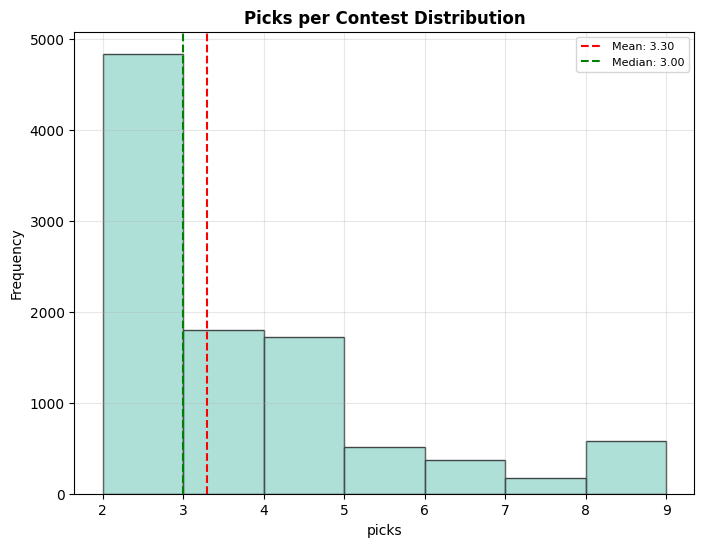

In [86]:
plot_histogram(df_sums, column='picks', column_name='Picks per Contest', bins=7)

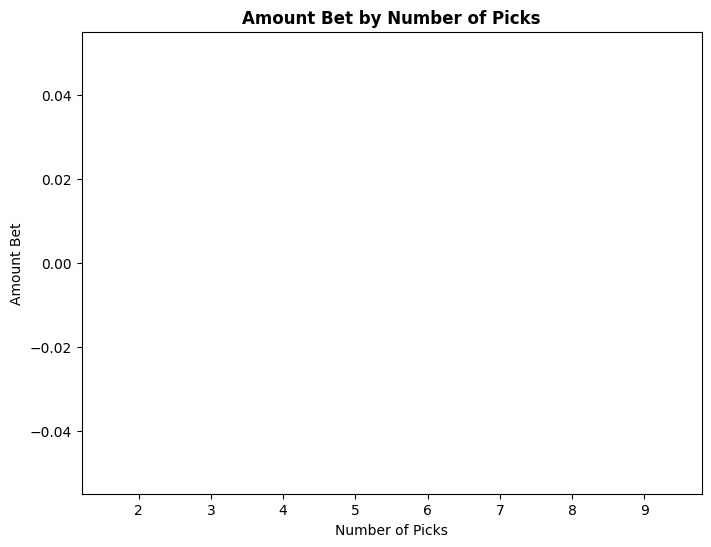

In [87]:
plot_bar_plot_with_optional_breakdown(df_number_of_picks, column_one='amount', column_one_name='Amount Bet', column_two='picks', column_two_name='Number of Picks')